In [ ]:
cd /content/drive/MyDrive/BigData_Study/BigData_Exam

In [ ]:
!git config --global user.email 'dydwns9436@naver.com'
!git config --global user.name 'dydwns9436'

!git add Study_04.ipynb

!git commit -m '2022-06-08'
!git push

# 데이터 전처리 개요

##1.데이터 전처리 유형

데이터 전처리는 데이터 가공, 데이터 핸들링 등 다양한 이름으로 불림

###1-1.데이터 전처리 필요성

데이터를 최초로 얻을 때의 목적에 맞게 구성되어 있기 때문에, 이 데이터를 다른 목적으로 사용하기 위해 재가공

데이터가 처리하기 좋은 형식으로 되어 있는지, 데이터를 새로 가공해야 하는지 등을 파악

> 데이터 전처리 형태

1.필터링
- 필요한 데이터를 골라냄

2.변환
- 데이터의 형식 변경

3.통합
- 여러 소스에서 온 데이터 합침

###1-2.결측치 처리

> 방법

1. 결측치가 포함되어 있는 항목을 버림

2. 결측치를 적절한 값으로 대체

3. 결측치를 NaN으로 표시하여 다음의 분석단계로 처리를 넘김

###1-3.틀린 값 처리

잘못된 값이 들어있는 것을 의미

틀린 값을 처리하는 방법 또한 결측치 처리 방법과 동일

###1-4.이상치 처리

값의 범위가 일반적인 범위를 벗어나 특별한 값을 갖는 것

###1-5.데이터 변환

분석하기 좋은 형태로 바꾸는 작업

데이터 분포를 고려하여 정규화하거나 단위를 조정하거나 로그 스케일로 변환하는 것 모두 지칭

> 종류

1. 범주형으로 변환
* 수치데이터를 범주형으로 변환

2. 일반 정규화
* 분석을 정확히 하기 위해 원래 주어진 수치 값을 바로 사용하는게 타당치 않고 정규화를 해야하는 경우가 많음

3. Z-score 정규화
* 표준 편차를 고려해 데이터  변환
* 평균을 0점으로, 표준 편차를 1점으로 환산하는 변환

4. 로그 변환
* 어떤 수치 값을 그대로 사용하지 않고 여기에 로그를 취한 값을 사용하는 것
* 로그를 취하면 그 분포가 정규분포에 가깝게 변환되는 경우가 있는데, 이런 분포를 로그 정규분포를 가진다고 함
* ex) 국가별 수출액 분포 그래프, 사람이 느끼는 감각, 값의 범위가 큰 경우 등

5. 역수 변환
- 변수에 역수를 사용하면 오히려 선형적인 특성을 가지게 되어 의미를 해석하기 쉬워지는 경우에 사용

###1-6.데이터 축소

같은 정보량을 가지면서 데이터의 크기를 줄이는 것

###1-7.샘플링

구할 수 있는 전체 데이터 중 분석에 필요한 데이터를 취하는 것

최소한의 샘플 데이터를 가지고 분석의 타당성을 조사하거나 분석 모델의 큰 방향을 정할 때도 필요

샘플링된 데이터가 전체 데이터의 특징을 계속 유지할 수 있도록 샘플링 해야함

###1-8.훈련 데이터와 테스트 데이터

모델을 만드는 과정을 훈련이라고 하며 이때 사용되는 데이터를 훈련용 데이터라고 함

훈련 과정은 각 모델을 구성하는 파라미터를 찾는 과정

모델의 성능을 검정하는 것을 테스트라고 하며 이때 사용되는 데이터를 테스트 데이터라고 함

##2.데이터 변환


###2-1.표준정규화

데이터의 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정을 데이터 스케일링이라 하며, 대표적으로 표준정규화, Min-Max 정규화가 있음


In [38]:
import numpy as np
import pandas as pd

#한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
meat_consumption_kr = 5*np.random.randn(1000) + 53.9
meat_consumption_jp = 4*np.random.randn(1000) + 32.7

#데이터 프레임 생성
meat_consumption = pd.DataFrame({'한국인' : meat_consumption_kr, '일본인' : meat_consumption_jp})

#상위 데이터 확인
meat_consumption.head()

,한국인,일본인
0,47.349975,23.010852
1,54.323530,35.180505
2,47.095874,30.097008
3,49.379516,21.279372
4,49.353836,25.950324


히스토그램 함수 : hist()

hist(x, bins=10, range=[0, 10], label = 'title')

x : 히스토그램 대상

bins : 지정한 수의 칸으로 나눔

range : 표시할 값의 범위

label : 각 그래프의 범례

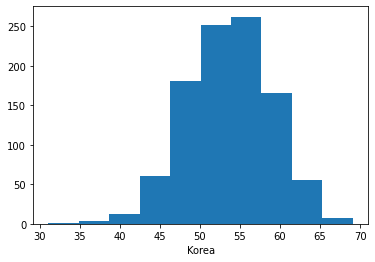

In [39]:
import matplotlib.pyplot as plt

plt.hist(meat_consumption_kr)
plt.xlabel('Korea')
plt.show()

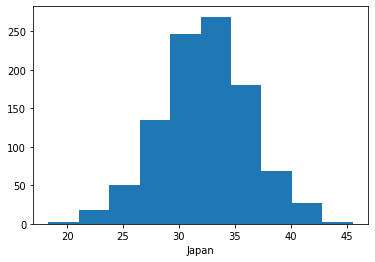

In [40]:
plt.hist(meat_consumption_jp)
plt.xlabel('Japan')
plt.show()

z-표준화

변수값에서 평균을 뺀 후 표준편차로 나누는 것

데이터 변환후 평균은 0, 표준편차는 1

(x-np.mean(x))/np.std(x) 또는 scipy패키지의 zscore() 또는 sckitlearn패키지의 preprocessing() 이용

In [41]:
#zscore() 이용

import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_kr)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_jp)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,47.349975,23.010852,-1.213333,-2.371660
1,54.323530,35.180505,0.130602,0.720271
2,47.095874,30.097008,-1.262302,-0.571288
3,49.379516,21.279372,-0.822202,-2.811575
4,49.353836,25.950324,-0.827151,-1.624831


In [42]:
#np함수 이용

meat_consumption['한국인_정규화2'] = (meat_consumption_kr - np.mean(meat_consumption_kr))/np.std(meat_consumption_kr)
meat_consumption['일본인_정규화2'] = (meat_consumption_jp - np.mean(meat_consumption_jp))/np.std(meat_consumption_jp)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,47.349975,23.010852,-1.213333,-2.371660,-1.213333,-2.371660
1,54.323530,35.180505,0.130602,0.720271,0.130602,0.720271
2,47.095874,30.097008,-1.262302,-0.571288,-1.262302,-0.571288
3,49.379516,21.279372,-0.822202,-2.811575,-0.822202,-2.811575
4,49.353836,25.950324,-0.827151,-1.624831,-0.827151,-1.624831


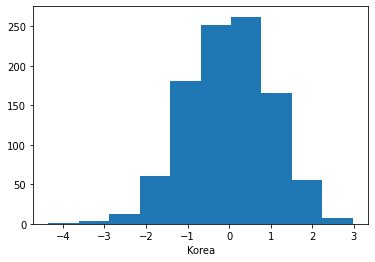

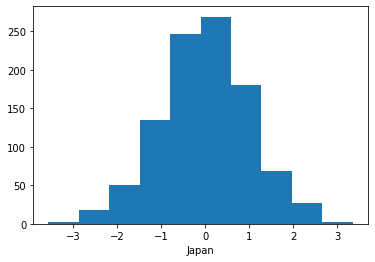

In [43]:
#표준화된 데이터에 대한 히스토그램

plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [50]:
#사이킷런 스케일러 이용 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,47.349975,23.010852,-1.213333,-2.371660,-1.213333,-2.371660,-1.213333,-2.371660
1,54.323530,35.180505,0.130602,0.720271,0.130602,0.720271,0.130602,0.720271
2,47.095874,30.097008,-1.262302,-0.571288,-1.262302,-0.571288,-1.262302,-0.571288
3,49.379516,21.279372,-0.822202,-2.811575,-0.822202,-2.811575,-0.822202,-2.811575
4,49.353836,25.950324,-0.827151,-1.624831,-0.827151,-1.624831,-0.827151,-1.624831
...,...,...,...,...,...,...,...,...
995,53.005465,31.103931,-0.123414,-0.315460,-0.123414,-0.315460,-0.123414,-0.315460
996,39.828605,28.894076,-2.662841,-0.876916,-2.662841,-0.876916,-2.662841,-0.876916
997,58.759292,31.625160,0.985456,-0.183032,0.985456,-0.183032,0.985456,-0.183032
998,49.767428,39.160985,-0.747444,1.731587,-0.747444,1.731587,-0.747444,1.731587


Min-Max 정규화

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
meat_consumption['한국인_정규화4'] = scaler2.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_정규화4'] = scaler2.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인', '일본인', '한국인_정규화4', '일본인_정규화4']]

,한국인,일본인,한국인_정규화4,일본인_정규화4
0,47.349975,23.010852,0.428083,0.172230
1,54.323530,35.180505,0.611611,0.619380
2,47.095874,30.097008,0.421395,0.432597
3,49.379516,21.279372,0.481496,0.108610
4,49.353836,25.950324,0.480820,0.280235
...,...,...,...,...
995,53.005465,31.103931,0.576922,0.469595
996,39.828605,28.894076,0.230138,0.388398
997,58.759292,31.625160,0.728349,0.488746
998,49.767428,39.160985,0.491705,0.765635


###2-2.정규분포변환

왜도는 분포의 대칭 척도로 값은 양수, 음수 또는 정의되지 않을 수 있음

- 왜도 > 0 일때, 왼쪽으로 치우침, 평균 > 중앙값 > 최빈값

- 왜도 = 0 일때, 좌우 대칭, 평균 = 중앙값 = 최빈값

- 왜도 < 0 일때, 오른쪽으로 치우침, 평균 < 중앙값 < 최빈값

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv')

df

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
5,"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6
6,"CALLAHAN,R.J.",10.6,9.0,8.9,8.7,8.5,8.5,8.5,8.5,8.6,8.4,9.1,9.0
7,"COHEN,S.S.",7.0,5.9,4.9,5.1,5.4,5.9,4.8,5.1,4.7,4.9,6.8,5.0
8,"DALY,J.J.",7.3,8.9,8.9,8.7,8.6,8.5,8.4,8.4,8.4,8.5,8.8,8.8
9,"DANNEHY,J.F.",8.2,7.9,6.7,8.1,7.9,8.0,7.9,8.1,7.7,7.8,8.5,7.9


In [55]:
#scipy 패키지 임포트
import scipy.stats as ss

#지정한 컬럼의 왜도 계산
print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


> 왜도가 양수인 경우

1.제곱근 변환
- sqrt(x)

2.로그 변환
- log(x) 또는 log10(x)

3.역수 변환
- 1/x

> 왜도가 음수인 경우

1.제곱근 변환
- sqrt(max(x+1)-x)

2.로그 변환
- log(max(x+1)-x) 또는 log10(max(x+1)-x)

3.역수 변환
- 1/(max(x+1)-x)

In [57]:
#CONT 변수는 양의 왜도를 가지므로 log(x)로 변환, PHYS 변수는 음의 왜도를 가지므로 log(max(x+1)-x)로 변환 후 다시 왜도 계산

#변수 변환 - 로그 변환
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(max(df['PHYS']+1)-df['PHYS'])

#왜도 계산
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


In [58]:
# 변수변환 - 로그변환
df["CONT2"] = np.log10(df["CONT"])
df["PHYS2"] = np.log10(np.max(df["PHYS"]+1) - df["PHYS"])

# 왜도 계산
print(ss.skew(df["CONT2"]))
print(ss.skew(df["PHYS2"]))

0.6555571886692441
0.5824357748750438


###2-3.범주화, 이산형화

연속형 변수를 범주형 변수로 변환하는 작업

몇 개의 범주로 나눌지와 어떤 기준으로 나눌지를 정하는 것이 중요

주로 cut(), qcut() 등을 사용해 범주화

73.5


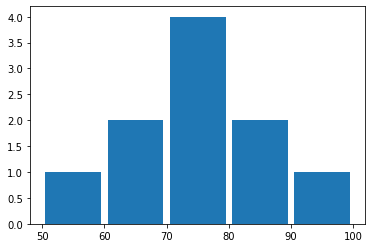

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [59]:
# 수학점수 (Math_score)
data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65], 
        ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])

print(np.mean(df["수학점수"]))

# 히스토그램, 범위 50~100, 5개 구간
plt.hist(df["수학점수"], bins=5, range=[50, 100], rwidth=0.9) # rwidth로 그래프 폭을 조절할 수 있음(생략 시 기본값 1)
plt.show()
df

In [61]:
# 조건을 사용해서 구간을 직접 지정
df["등급"] = 0        # 등급 컬럼을 생성하고 0으로 초기화
df.loc[(df["수학점수"]<60), "등급"] = "F"
df.loc[(df["수학점수"]>=60) & (df["수학점수"]<70), "등급"] = "D"
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80), "등급"] = "C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90), "등급"] = "B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<=100), "등급"] = "A"
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


pd.cut(x='데이터', bins = 경계값 리스트, labels = bin 이름, include_lowest=True)

- x: 구간을 나눌 데이터 컬럼 지정
- bins: 경계값 리스트를 지정
- labels: 각 구간의 이름을 지정
- include_lowest = True : 각 구간의 낮은 경계값을 포함(a<=x<b)

In [62]:
# cut() 함수 사용
df["등급"] = pd.cut(x=df["수학점수"], bins=[0,60,70,80,90,100], labels=["F","D","C","B","A"], include_lowest=True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


qcut()함수는 bins를 직접 수치로 지정하지 않고 나누고자 하는 범주 개수만 정해주면 각 범주에 균등한 수의 데이터가 채워짐

동일한 구간이 아닌 동일한 개수로 나누어지도록 구간을 지정할 때 사용

In [63]:
# qcut() 함수 사용
df["등급_qcut"] = pd.qcut(x=df["수학점수"], q=5, labels=["F","D","C","B","A"],)
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


##3.차원축소 ; PCA

주성분분석이란 여러 변수들의 변량을 주성분이라고 불리는 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로 요약, 축소하는 기법

In [64]:
import numpy as np                  # 넘파이 패키지 임포트
import pandas as pd                 # 판다스 패키지 임포트
import matplotlib.pyplot as plt     # 맷플롯립 패키지 임포트

# 깃허브에 있는 csv 파일을 읽어와서 iris로 넣는다.
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [65]:
df = iris.drop(['species'], axis=1)
df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
[df_species]

[0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object]

In [68]:
# 변수 정규화
from sklearn.preprocessing import StandardScaler
df["sepal_length"] = StandardScaler().fit_transform(df[["sepal_length"]])
df["sepal_width"] = StandardScaler().fit_transform(df[["sepal_width"]])
df["petal_length"] = StandardScaler().fit_transform(df[["petal_length"]])
df["petal_width"] = StandardScaler().fit_transform(df[["petal_width"]])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


1. n_components는 PCA로 변환할 차원의 수를 의미

2. 원본 데이터셋이 (150, 4)의 배열로 변환됨

3. pca.explained_variance_ratio_ 변수는 변환된 각각의 차원의 기여도를 보여줌

4. 첫 번째 PCA 변환요소만으로 전체 변동성의 73%를 설명 가능하며 두번 째 요소는 22.8% 설명이 가능

5. 따라서 2개 요소로만 변환해도 95.8% 설명이 가능하므로 변수를 2개로 줄일 수 있음

##4.결측치 처리

###4-1.결측치 확인과 제거


In [69]:
#1. 결측치가 포함되어 있는지 확인 : isnull()

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
#2. 데이터셋의 결측치 확인 : isnull(), info(), sum()등을 이용해 각 컬럼에 대한 결측치 개수 파악

print(df.isnull().sum())
print('-'*40)
df.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64

In [74]:
#3. 결측치가 있는 행 전체를 데이터셋에서 제거 : dropna()를 이용해 결측치가 들어있는 행 전체를 제거

# 결측치가 있는 모든 행 제거
df_1 = df.dropna(axis=0)

print(df_1.isnull().sum().sum()) # 데이터프레임 결측치 전체
df_1.shape # 데이터프레임 크기

#만일 특정 칼럼에 결측치가 있는 것만 제거하고 싶은 경우 : df.dropna(subset=['칼럼명'])으로 진행

0


(183, 12)

In [75]:
df_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [86]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


###4-2.결측치 대체

fillna()함수를 이용해 널 값을 대체

In [88]:
print(df["Age"].isnull().sum())             # Age 컬럼의 결측치 개수
age_mean = df["Age"].mean()                 # Age 컬럼의 평균
df["Age"].fillna(age_mean, inplace=True)    # Age 컬럼의 결측치를 평균으로 대체
print(df["Age"].isnull().sum())             # Age 컬럼의 결측치 개수

0
0
